In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
test = pd.read_csv('/kaggle/input/titanic/test.csv')
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

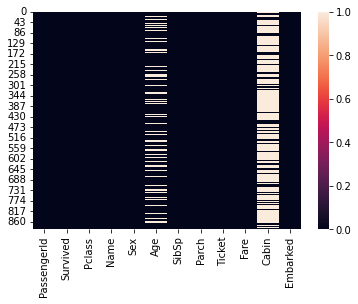

In [5]:
sns.heatmap(train.isnull())

<AxesSubplot:xlabel='Survived', ylabel='count'>

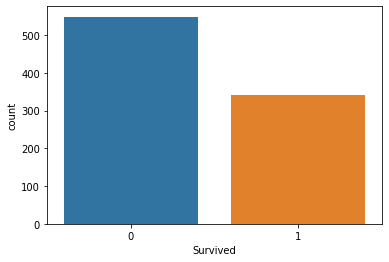

In [6]:
sns.countplot('Survived', data = train)

In [7]:
print(f"Survived percentage : {round((train['Survived'] == 1).sum()/train['Survived'].count() * 100, 1)} %")
print(f"Didn't survive percentage : {round((train['Survived'] == 0).sum()/train['Survived'].count() * 100, 1)} %")

Survived percentage : 38.4 %
Didn't survive percentage : 61.6 %


<AxesSubplot:xlabel='Survived', ylabel='count'>

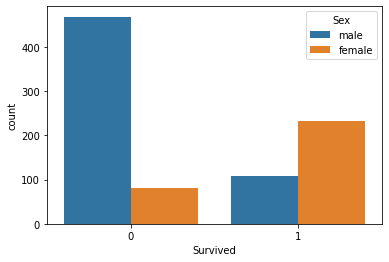

In [8]:
sns.countplot('Survived', data = train, hue = 'Sex')

In [9]:
train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [10]:
# percentage of survived by sex
train.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [11]:
# Number of female nad male passengers
train.groupby(['Sex'])['Survived'].count()

Sex
female    314
male      577
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

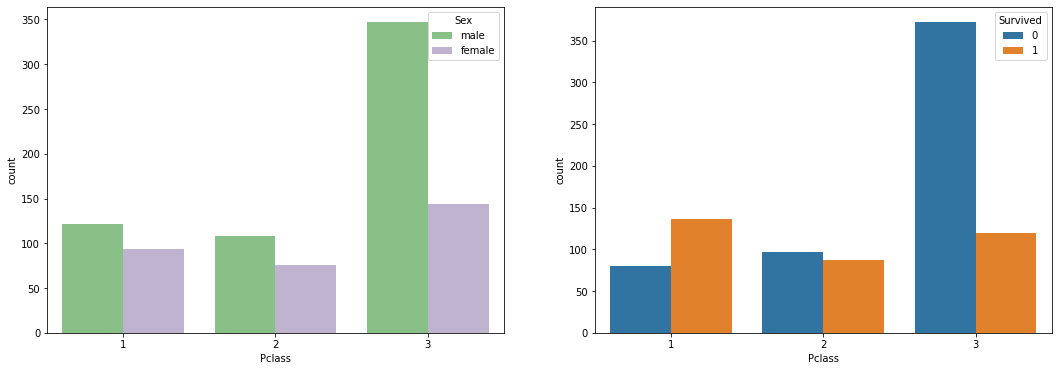

In [12]:
fig, ax = plt.subplots(1,2, figsize = (18,6))
sns.countplot('Pclass', data = train, hue = 'Sex', ax = ax[0], palette = 'Accent')
sns.countplot('Pclass', data = train, hue = 'Survived', ax = ax[1])

In [13]:
pd.crosstab(index = [train['Sex'],train['Survived']], columns = train['Pclass'], margins = True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

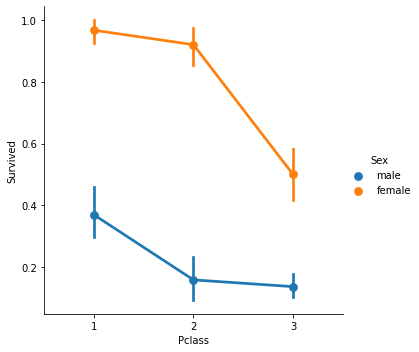

In [14]:
#We see that around 95% women in first class survived
sns.factorplot(x='Pclass', y='Survived', hue='Sex', data = train)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

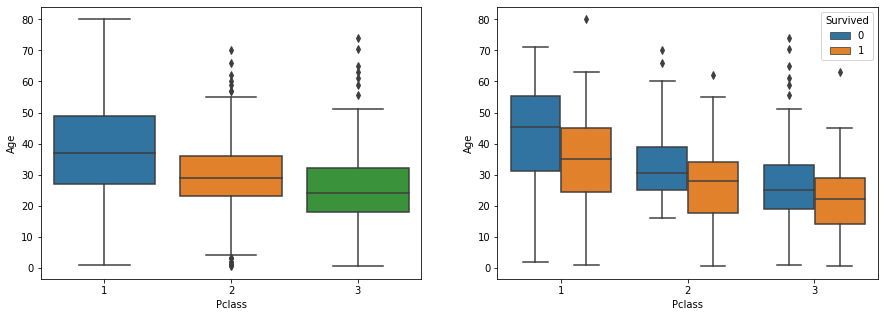

In [15]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Pclass', y='Age', data= train, ax = ax[0])
sns.boxplot(x='Pclass', y='Age', hue = 'Survived', data= train, ax = ax[1])

In [16]:
# We have 177 null values in Age column. We have to append those values with some approximate ones
# We can just use mean value for the null values, but we can also extract the titles such Mr, Miss and others
# and their mean age, to get a more accurate approximation of the missing data of age.
# Lets find those with Mr, Mrs and Miss in their name

def find_mr(name):
    if 'Mr.' in name:
        return True

In [17]:
def find_mrs(name):
    if 'Mrs.' in name:
        return True

In [18]:
def find_miss(name):
    if 'Miss.' in name:
        return True

In [19]:
train['Mr'] = train['Name'].apply(find_mr)

In [20]:
train['Mrs'] = train['Name'].apply(find_mrs)

In [21]:
train['Miss'] = train['Name'].apply(find_miss)

In [22]:
train[train['Mr'] == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Mr,Mrs,Miss
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True,None,None
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True,None,None
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,True,None,None
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,True,None,None
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,True,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S,True,None,None
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S,True,None,None
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,True,None,None
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,True,None,None


In [23]:
# Lets see what's average age for Mr:
train[train['Name'].apply(find_mr) == True]['Age'].mean()

32.368090452261306

In [24]:
train.loc[ (train['Age'].isnull() == True) & (train['Mr'] == True),'Age'] = round(train[train['Mr'] == True]['Age'].mean())

In [25]:
train.loc[(train['Age'].isnull())&(train['Mrs'] == True),'Age'] = round(train[train['Mrs'] == True]['Age'].mean())

In [26]:
round(train[train['Mrs'] == True]['Age'].mean())

36

In [27]:
round(train[train['Miss'] == True]['Age'].mean())

22

In [28]:
train.loc[(train['Age'].isnull())&(train['Miss'] == True),'Age'] = round(train[train['Miss'] == True]['Age'].mean())

In [29]:
#They are all male so we could give 'Mr.' mean age to them
train[train["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Mr,Mrs,Miss
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C,None,None,None
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S,None,None,None
176,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S,None,None,None
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C,None,None,None
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,None,None,None


In [30]:
train.loc[train['Age'].isnull(), 'Age'] = round(train[train['Mr'] == True]['Age'].mean())

In [31]:
#Finally, we have 0 null values in Age column
train["Age"].isnull().sum()

0

In [32]:
#We don't need those anymore
del train['Mr']
del train['Mrs']
del train['Miss']

In [33]:
train.isnull().sum()
#We have two null values for column 'Embarked'

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

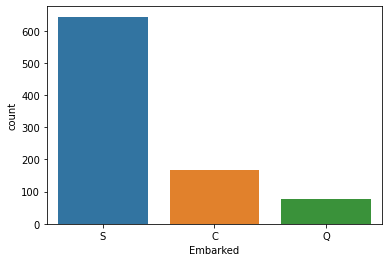

In [34]:
# So, the majority of passengers came from 'S'. We can put those two null in there.
sns.countplot('Embarked', data = train)

In [35]:
train.loc[train['Embarked'].isnull(), 'Embarked'] = 'S'

In [36]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [37]:
# All there is left with null values is the 'Cabin' column.
# It seems that there are too many missing data on this columns, so we could delete it.
train.drop(labels='Cabin', axis = 1, inplace = True)

In [38]:
# Done with the missing data.
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:xlabel='Fare', ylabel='Count'>

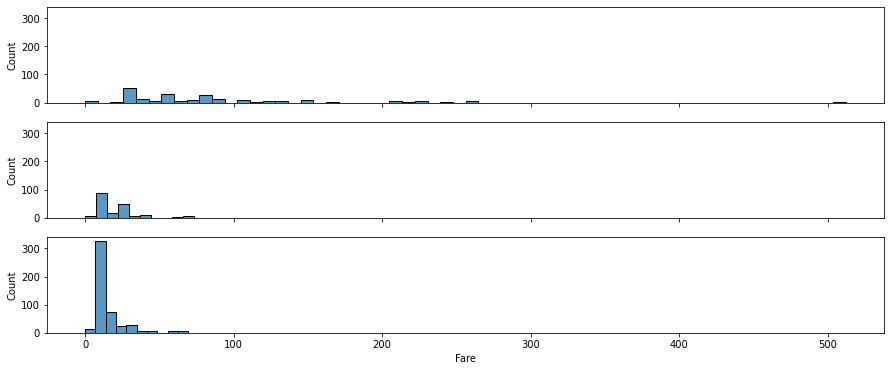

In [39]:
fig, ax = plt.subplots(3,1, sharex = True, sharey = True, figsize=(15,6))
sns.histplot(data = train[train['Pclass'] == 1], x = 'Fare', ax = ax[0], bins = 60)
sns.histplot(data = train[train['Pclass'] == 2], x = 'Fare', ax = ax[1], bins = 10)
sns.histplot(data = train[train['Pclass'] == 3], x = 'Fare', ax = ax[2], bins = 10)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

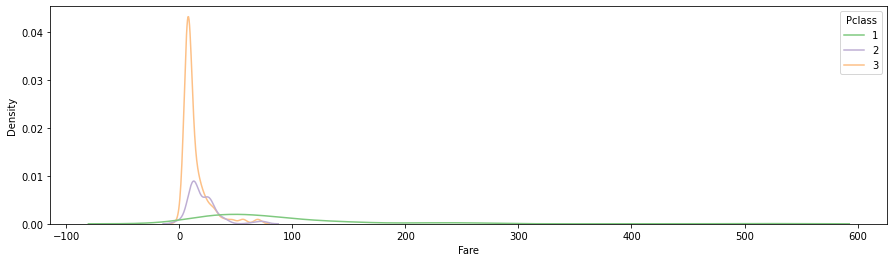

In [40]:
plt.figure(figsize=(15,4))
sns.kdeplot(x = 'Fare', data = train, hue = 'Pclass', palette = 'Accent')

<AxesSubplot:>

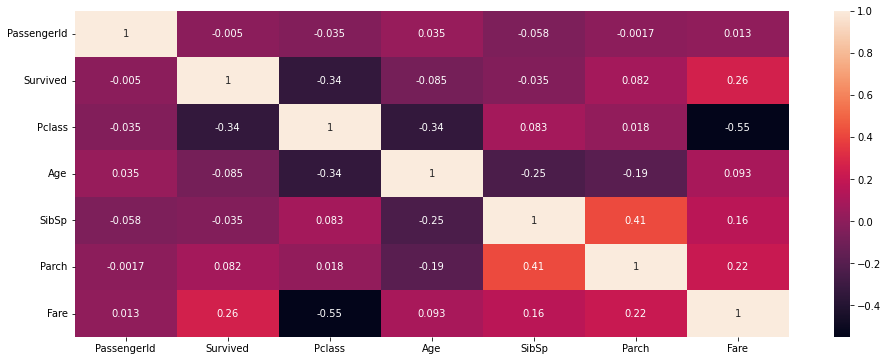

In [41]:
plt.figure(figsize=(16,6))
sns.heatmap(train.corr(), annot= True)
# We can see there is no highly correlated data, so we don't have multicolinearity problem.
# From the heatmap we can also see that there is a greater chance if a passenger has a higher 'Fare'
# he will likely be in upper class (-0.55 corr)
# Also, a little correlation between age and Pclass, as it tends that older people are more likely
# to travel in higher class.
# Also, with a -0.34 and 0.26 correlation values, respectively, it tells us the higher Pclass and Fare,
# the higher the chances of surviving are.

In [42]:
# As we can see, the Age column is a continous feature, and we can do much with that kind of feature
# in Machine Learning. So, we can split Age in few categories.
# Let's say the age is in range 0-80.
print(f"The Oldest passenger is : {round(train['Age'].max())} years old")
print(f"The Youngest passenger is : {train['Age'].min()} years old")
print(f"The Average age of passengers is : {round(train['Age'].mean())}")

The Oldest passenger is : 80 years old
The Youngest passenger is : 0.42 years old
The Average age of passengers is : 30


In [43]:
# We can split it in 8 groups, within 10 years of age
train['Age_class'] = 0
train.loc[train['Age'] <= 10, 'Age_class'] = 0
train.loc[train['Age'] > 10, 'Age_class'] = 1
train.loc[train['Age'] > 20, 'Age_class'] = 2
train.loc[train['Age'] > 30, 'Age_class'] = 3
train.loc[train['Age'] > 40, 'Age_class'] = 4
train.loc[train['Age'] > 50, 'Age_class'] = 5
train.loc[train['Age'] > 60, 'Age_class'] = 6
train.loc[train['Age'] > 70, 'Age_class'] = 7

In [44]:
train['Age_class'].value_counts()

3    296
2    266
1    115
4     86
0     64
5     42
6     17
7      5
Name: Age_class, dtype: int64

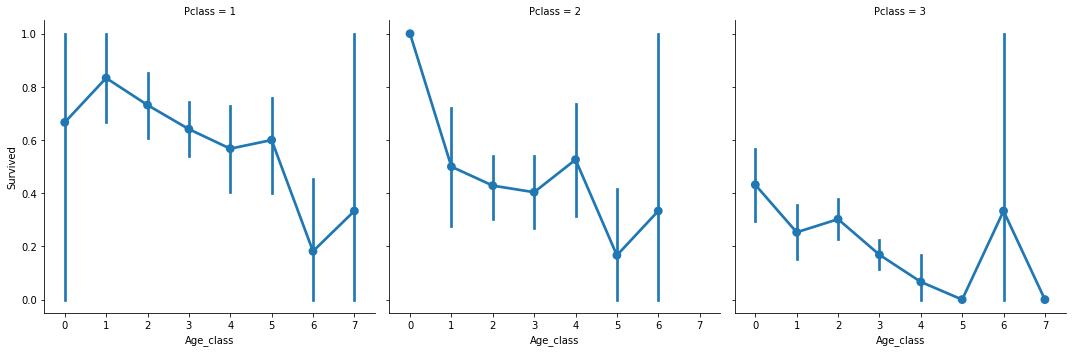

In [45]:
sns.factorplot(x = 'Age_class', y = 'Survived', data = train, col = 'Pclass')

In [46]:
# Let's now examine if the size of the family of a passenger matters
train['Family_size'] = 0
train['Family_size'] = train['Parch'] + train['SibSp']
train['Family_size'].value_counts()
# Seems like the majority of passengers were not with family on the boat

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family_size, dtype: int64

<AxesSubplot:xlabel='Family_size', ylabel='count'>

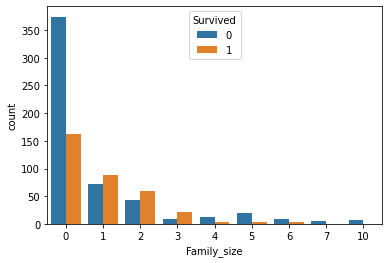

In [47]:
# It's interesting that the passengers who travelled alone had a significantly lower chance of surviving
# while the ones with a family size of 1,2 and 3 had greatest chance to survive. 
sns.countplot(x='Family_size', data = train, hue = 'Survived')

In [48]:
# Next is 'Fare' column. Let's make it categorical.
train['Fare_cat'] = pd.qcut(x = train['Fare'], q = 4)

In [49]:
# So what pd.qcut does is, it splits the feature values into 'q' equally numbered categories
train['Fare_cat'].value_counts()

(7.91, 14.454]     224
(-0.001, 7.91]     223
(14.454, 31.0]     222
(31.0, 512.329]    222
Name: Fare_cat, dtype: int64

In [50]:
# Let's name this categories appropriately.
train['Fare_class'] = 0
train.loc[train['Fare'] <= 7.91, 'Fare_class'] = 0
train.loc[train['Fare'] > 7.91, 'Fare_class'] = 1
train.loc[train['Fare'] > 14.455, 'Fare_class'] = 2
train.loc[train['Fare'] > 31.0, 'Fare_class'] = 3

In [51]:
train['Fare_class'].value_counts()

1    224
0    223
3    222
2    222
Name: Fare_class, dtype: int64

<AxesSubplot:xlabel='Fare_class', ylabel='Survived'>

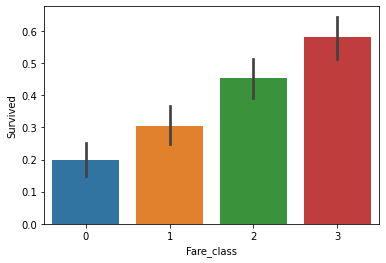

In [52]:
sns.barplot( x = 'Fare_class', y = 'Survived', data = train)
# So we see a very useful trend of higher fare_class well correlated with surviving percentage

In [53]:
# We need to convert Sex = male/female to dummy variables like 0 and 1 to make our computer understands it
train = pd.concat([train, pd.get_dummies( train['Sex'], drop_first=True)], axis = 1)

In [54]:
train = pd.concat([train, pd.get_dummies( train['Embarked'], drop_first=True)], axis = 1)

In [55]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_class,Family_size,Fare_cat,Fare_class,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,1,"(-0.001, 7.91]",0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3,1,"(31.0, 512.329]",3,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,2,0,"(7.91, 14.454]",1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3,1,"(31.0, 512.329]",3,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,3,0,"(7.91, 14.454]",1,1,0,1


In [56]:
train.drop(labels = ['Sex','Fare_cat','PassengerId', 'Name', 'Age',
                     'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked'], axis = 1, inplace = True)

In [57]:
train.head()

,Survived,Pclass,Age_class,Family_size,Fare_class,male,Q,S
0,0,3,2,1,0,1,0,1
1,1,1,3,1,3,0,0,0
2,1,3,2,0,1,0,0,1
3,1,1,3,1,3,0,0,1
4,0,3,3,0,1,1,0,1


<AxesSubplot:>

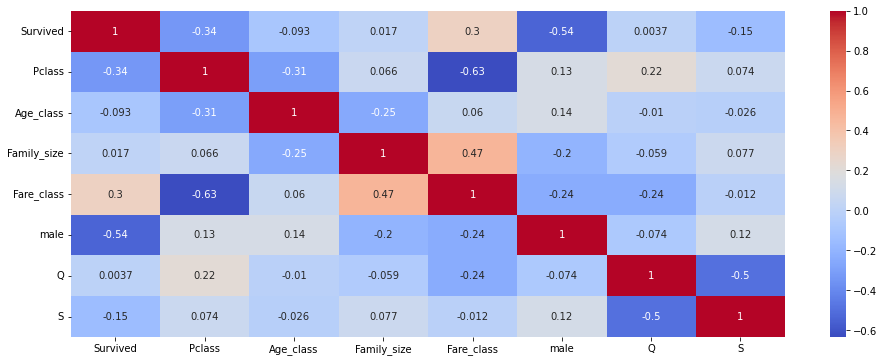

In [58]:
plt.figure(figsize=(16,6))
sns.heatmap(train.corr(), annot = True, cmap = 'coolwarm')

--------------------
## Predicting using classification algorithms
--------------------

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [60]:
train.head()
y = train['Survived']
X = train.drop('Survived', axis = 1)

In [61]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
# SVM 
from sklearn.svm import SVC

model = SVC(random_state=101)
model.fit(X_train, y_train)
predictions_1 = model.predict(X_val)

print (f"Accuracy for the SVM is : {accuracy_score(y_val, predictions_1)}")

Accuracy for the SVM is : 0.8246268656716418


In [63]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=101)
model.fit(X_train,y_train)
predictions_2 = model.predict(X_val)

print (f"Accuracy for the Random Forest Classifier is : {accuracy_score(y_val, predictions_2)}")

Accuracy for the Random Forest Classifier is : 0.7798507462686567


In [64]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=101)
model.fit(X_train,y_train)
predictions_3 = model.predict(X_val)

print (f"Accuracy for the Decision Tree Classifier is : {accuracy_score(y_val, predictions_3)}")

Accuracy for the Decision Tree Classifier is : 0.75


In [65]:
# Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
predictions_4 = model.predict(X_val)

print (f"Accuracy for the Gaussian Naive Bayes is : {accuracy_score(y_val, predictions_4)}")

Accuracy for the Gaussian Naive Bayes is : 0.7873134328358209


In [66]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=101)
model.fit(X_train, y_train)
predictions_5 = model.predict(X_val)

print (f"Accuracy for the Linear Regression is : {accuracy_score(y_val, predictions_5)}")


Accuracy for the Linear Regression is : 0.8097014925373134


In [67]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)
predictions_6 = model.predict(X_val)

print (f"Accuracy for the KNN is : {accuracy_score(y_val, predictions_6)}")

Accuracy for the KNN is : 0.7985074626865671


In [68]:
# Elbow method for KNN for finding an optimal number of neighbors
accuracies = []

for i in range(1,30):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    predictions_i = model.predict(X_val)
    accuracies.append(accuracy_score(y_val, predictions_i))

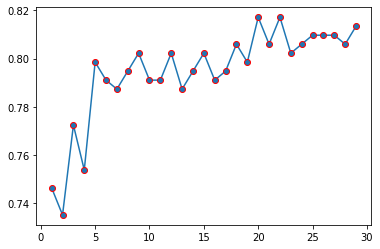

In [69]:
plt.plot(range(1,30), accuracies, marker = 'o', markeredgecolor = 'red')
# We can see that the classifier is the most accurate at n_neigbors = 19 and 21. 

In [70]:
# KNN with 21 neighbors
accuracies[21]

0.8171641791044776

In [71]:
# Cross-Validation

from sklearn.model_selection import KFold, cross_val_score,cross_val_predict

In [72]:
kfold = KFold(n_splits=10, random_state=101)
models = [SVC(random_state=101), RandomForestClassifier(random_state=101), DecisionTreeClassifier(random_state=101), GaussianNB(),
          LogisticRegression(random_state=101), KNeighborsClassifier(), KNeighborsClassifier(n_neighbors=21)]
accuracies_cv = []
std_cv = []
mean_cv = []
for i in models:
    model = i
    cv_result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    mean_cv.append(cv_result.mean())
    accuracies_cv.append(cv_result)
    std_cv.append(cv_result.std())

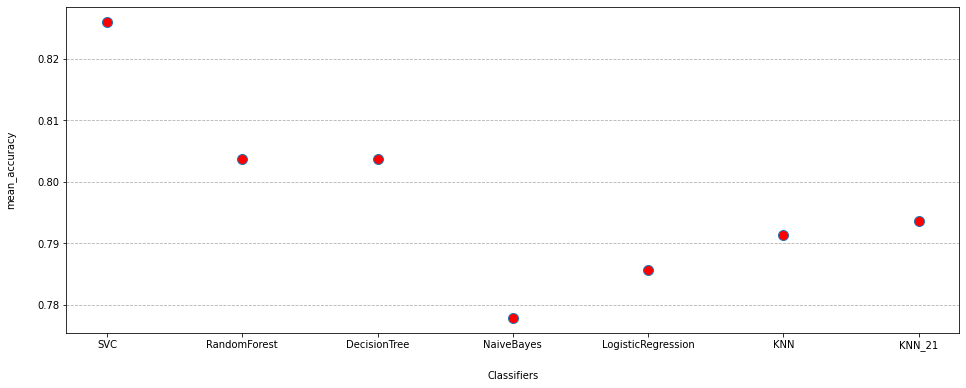

In [73]:
plt.figure(figsize = (16,6))
plt.plot(range(1,8),mean_cv, marker = 'o', markersize = 10, markerfacecolor ='r', lw = 0)
labels = ['SVC','RandomForest','DecisionTree','NaiveBayes','LogisticRegression','KNN', 'KNN_21']
plt.xticks([1,2,3,4,5,6,7], labels)
plt.xlabel('Classifiers', labelpad= 20)
plt.ylabel('mean_accuracy',labelpad= 20)
plt.grid(axis = 'y', ls = '--')


In [74]:
df_ac = pd.DataFrame(data = accuracies_cv, index= labels).transpose()

<AxesSubplot:>

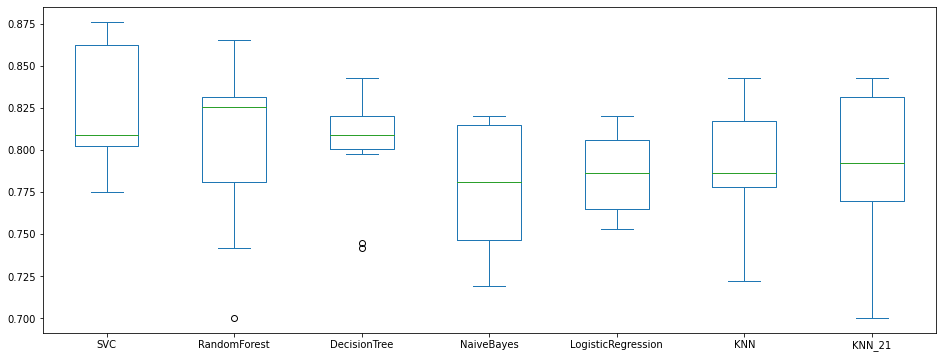

In [75]:
df_ac[:].plot.box(figsize = (16,6))

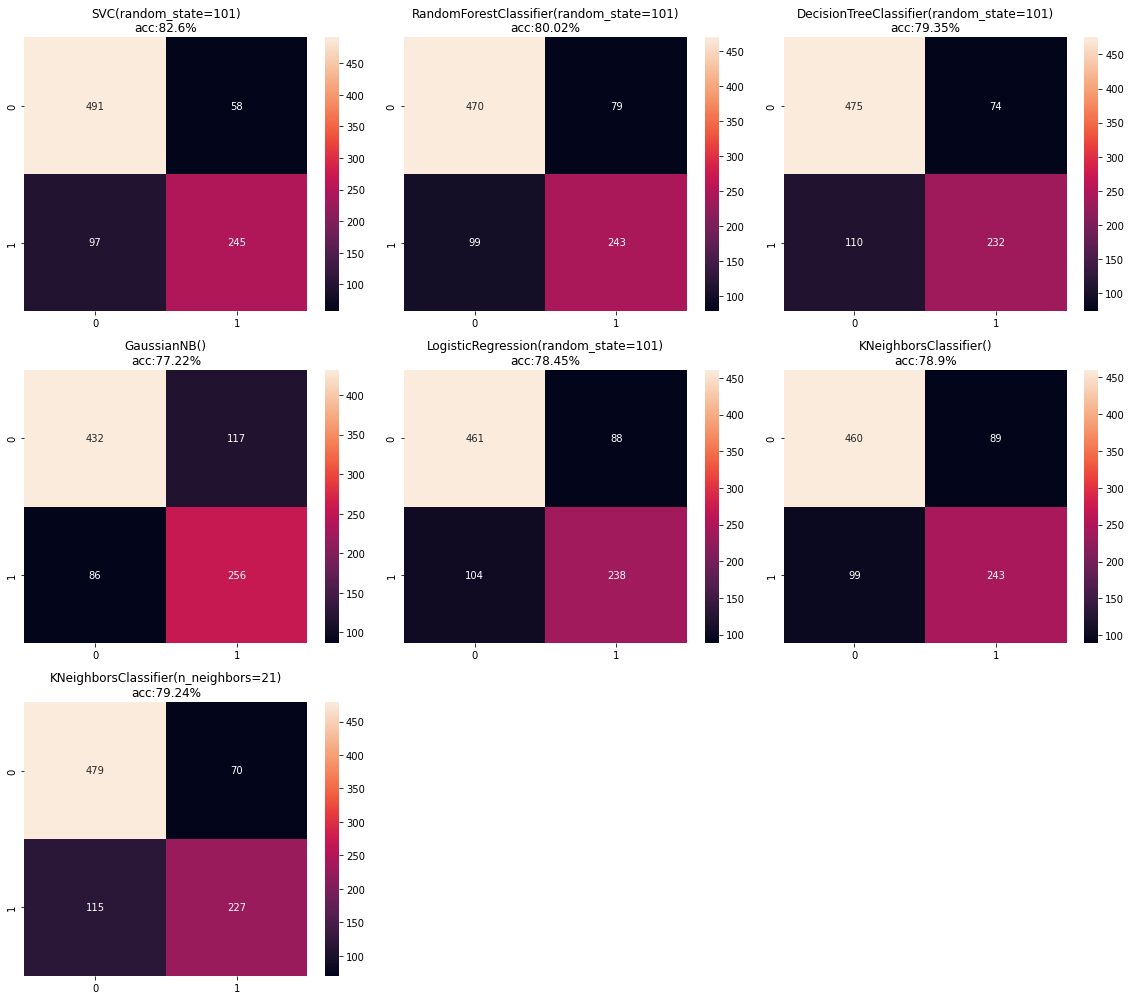

In [76]:
# Let's see a detailed information on these classifiers with confusion matrix
mean_cross_predict = []

fig, ax = plt.subplots(3,3, figsize = (16,14))
fig.delaxes(ax[2,1])
fig.delaxes(ax[2,2])

for count,i in enumerate(models):
    y_pred = cross_val_predict(i,X,y, cv = 10)
    mean_cross_predict.append(accuracy_score(y,y_pred))
    sns.heatmap(confusion_matrix(y, y_pred), annot = True, fmt = '1.0f', ax = ax[count // 3, count % 3 ])
    ax[count // 3, count % 3 ].set_title(f"{i}\nacc:{round(accuracy_score(y,y_pred), 4)*100}%")
plt.tight_layout()

We see that SVC gives the best accuracy of all classifiers, and also Random Forest being the second best.
Here we can see a detailed view on which technique is better in predicting the dead and which in predicting the survived ones.
It's clear that 'Naive Bayes' (GaussianNB) method is the worst one, but especially in predicting the dead passengers (117 false postives with 432 true negatives) with 21.3% mistakes on that particular aspect.
What's interesting, though, is that if predicting the survived passengers is what matters the most,
Naive Bayes method is the best one with only 86 false negative cases, while the KNN(n_neighbors=21) being the worst with 115 false negatives.

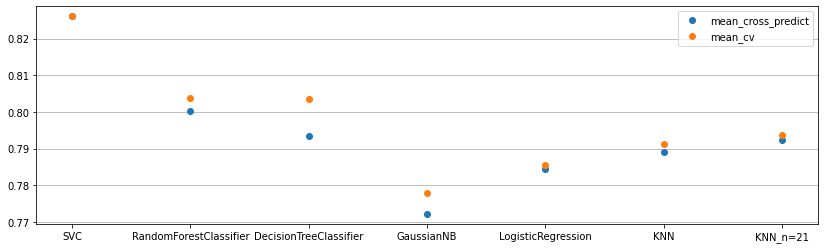

In [77]:
# Differences between using cross_val_score and cross_val_predict.
# As we can see, there aren't bigger differences than 0.9%
plt.figure(figsize =(14,4))
plt.plot(range(7),mean_cross_predict, lw = 0, marker = 'o', label = 'mean_cross_predict')
plt.plot(range(7),mean_cv, lw = 0, marker = 'o', label = 'mean_cv')
plt.legend()
plt.xticks(ticks = range(7), labels = ['SVC','RandomForestClassifier','DecisionTreeClassifier','GaussianNB',
                                      'LogisticRegression','KNN','KNN_n=21'] )
plt.grid(axis='y')

In [78]:
# Let's try to tune some hyperparameters in two of the best classifiers for our problem, that's SVC and
# Random Forest
from sklearn.model_selection import GridSearchCV
C = [0.01,0.05,0.1,0.15,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1, 10, 100]
gamma = [0.01,0.05,0.1,0.15,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1, 10, 100]

grid_search = GridSearchCV(estimator = SVC(random_state=101), param_grid={'C': C, 'gamma': gamma})
grid_search.fit(X,y)
print(f"The best parameters are: {grid_search.best_params_}")
print(f"The best score is : {grid_search.best_score_}")

The best parameters are: {'C': 0.8, 'gamma': 0.25}
The best score is : 0.8339024543343168


In [79]:
grid_rf = GridSearchCV(estimator = RandomForestClassifier(random_state=101), param_grid={'n_estimators': [10,50,100,150,200,300,400,500
                                                                                          ,600,700,800,900,1000]})
grid_rf.fit(X,y)

print(f"The best parameters are: {grid_rf.best_params_}")
print(f"The best score is : {grid_rf.best_score_}")

The best parameters are: {'n_estimators': 1000}
The best score is : 0.8160065281526583


We managed to improve results in SVC and RF by around 0.8% and 1.6%, respectively by finding the best parameters through Grid Search CV.

In [80]:
# Finally, let's try ensembling techniques to see if we can improve accuracy

# Voting
# voting = 'soft'
from sklearn.ensemble import VotingClassifier

voting_cl = VotingClassifier(estimators = [('SVC', SVC(C = 0.8, gamma = 0.25, probability = True,)),
                                           ('RFor', RandomForestClassifier(n_estimators=1000)),
                                           ('KNN', KNeighborsClassifier(n_neighbors=21)),
                                           ('LogReg', LogisticRegression()),
                                           ('NaiveBayes', GaussianNB())],
                                            voting = 'soft').fit(X_train,y_train)
print(voting_cl.score(X_val,y_val))

0.7947761194029851


In [81]:
# voting = 'hard'
voting_cl_hard = VotingClassifier(estimators = [('SVC', SVC(C = 0.8, gamma = 0.25, probability = True)),
                                               ('RFor', RandomForestClassifier(n_estimators=1000)),
                                               ('KNN', KNeighborsClassifier(n_neighbors=21)),
                                               ('LogReg', LogisticRegression()),
                                               ('NaiveBayes', GaussianNB())],
                                                voting = 'hard').fit(X_train,y_train)
print(voting_cl_hard.score(X_val,y_val))

0.8134328358208955


In [82]:
# Bagging
from sklearn.ensemble import BaggingClassifier
bag_cl = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=21), n_estimators=700, random_state=101)
bag_cl.fit(X_train,y_train)
pred_bag = bag_cl.predict(X_val)
print(accuracy_score(y_val,pred_bag))

0.8022388059701493


In [83]:
# Boosting (Adaptive Boosting)
# Default base estimator is Decision Tree
from sklearn.ensemble import AdaBoostClassifier
adap = AdaBoostClassifier(n_estimators=200, random_state=101, learning_rate=0.1)
adap_cross = cross_val_score(adap,X,y,cv=10,scoring='accuracy')
print(adap_cross.mean())

0.8047066167290886


In [84]:
# grid_adap = GridSearchCV(estimator = AdaBoostClassifier(),param_grid={'n_estimators': [50,100,200,300,400,600,1000],
#                                                                      'learning_rate': [0.01,0.05,0.1,0.15,0.2,0.3,0.5,0.7]})
# grid_adap.fit(X_train,y_train)
# print(grid_adap.best_params_)
# print(grid_adap.best_score_)

In [85]:
model = RandomForestClassifier(n_estimators=200, random_state = 101)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=101)

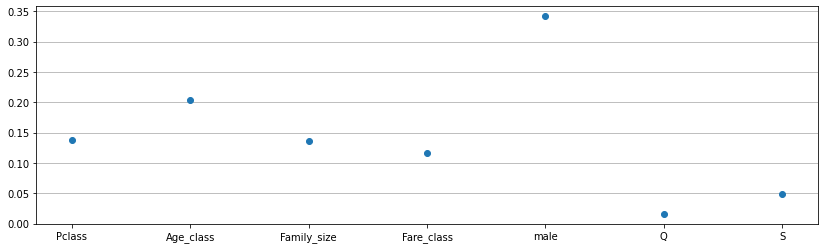

In [86]:
plt.figure(figsize=(14,4))
plt.plot(X.columns,model.feature_importances_, lw = 0, marker = 'o')
plt.grid(axis = 'y')

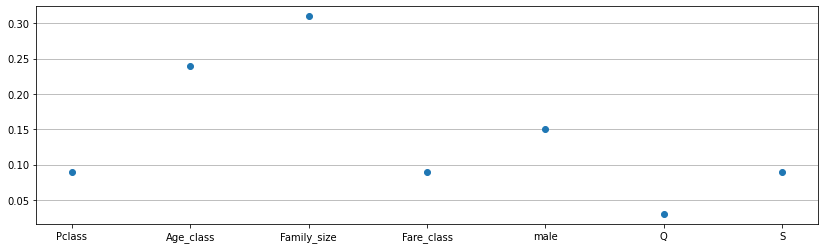

In [87]:
model_adap = AdaBoostClassifier(n_estimators=100,learning_rate=0.3, random_state=101)
model_adap.fit(X_train,y_train)

plt.figure(figsize=(14,4))
plt.plot(X.columns,model_adap.feature_importances_, lw = 0, marker = 'o')
plt.grid(axis = 'y')

----------------
# After all this testing and finding the best solution, it seems that the best algorithm to use in this case is Support Vector Classifier with hyperparameters C = 0.8 and gamma = 0.25, which gives us 83.4% correct predictions.
-------

Now, if we want to submit our predictions on test data in Kaggle, we must have test data have the same features as train data. 

In [88]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [89]:
test['Mr'] = test['Name'].apply(find_mr)
test['Mrs'] = test['Name'].apply(find_mrs)
test['Miss'] = test['Name'].apply(find_miss)

In [90]:
test[['Mr','Age']]

,Mr,Age
0,True,34.5
1,None,47.0
2,True,62.0
3,True,27.0
4,None,22.0
...,...,...
413,True,NaN
414,None,39.0
415,True,38.5
416,True,NaN


In [91]:
test.loc[ (test['Age'].isnull() == True) & (test['Mr'] == True),'Age'] = round(test[test['Mr'] == True]['Age'].mean())

In [92]:
test.loc[ (test['Age'].isnull() == True) & (test['Mrs'] == True),'Age'] = round(test[test['Mrs'] == True]['Age'].mean())

In [93]:
test.loc[ (test['Age'].isnull() == True) & (test['Miss'] == True),'Age'] = round(test[test['Miss'] == True]['Age'].mean())

In [94]:
test.loc[test['Age'].isnull(), 'Age'] = round(test[test['Mr'] == True]['Age'].mean())

In [95]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Mr             178
Mrs            346
Miss           340
dtype: int64

In [96]:
del test['Mr'], test['Mrs'], test['Miss']

In [97]:
test.isnull().sum()
test.drop('Cabin', axis = 1, inplace = True)

In [98]:
test.isnull().sum()


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [99]:
test.loc[test['Fare'].isnull(), 'Fare'] = test['Fare'].mean()

In [100]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [101]:
test['Age_class'] = 0
test.loc[test['Age'] <= 10, 'Age_class'] = 0
test.loc[test['Age'] > 10, 'Age_class'] = 1
test.loc[test['Age'] > 20, 'Age_class'] = 2
test.loc[test['Age'] > 30, 'Age_class'] = 3
test.loc[test['Age'] > 40, 'Age_class'] = 4
test.loc[test['Age'] > 50, 'Age_class'] = 5
test.loc[test['Age'] > 60, 'Age_class'] = 6
test.loc[test['Age'] > 70, 'Age_class'] = 7

In [102]:
test[['Age','Age_class']]

,Age,Age_class
0,34.5,3
1,47.0,4
2,62.0,6
3,27.0,2
4,22.0,2
...,...,...
413,32.0,3
414,39.0,3
415,38.5,3
416,32.0,3


In [103]:
test['Family_size'] = 0
test['Family_size'] = test['Parch'] + test['SibSp']

In [104]:
test['Fare_class'] = 0
test.loc[test['Fare'] <= 7.91, 'Fare_class'] = 0
test.loc[test['Fare'] > 7.91, 'Fare_class'] = 1
test.loc[test['Fare'] > 14.455, 'Fare_class'] = 2
test.loc[test['Fare'] > 31.0, 'Fare_class'] = 3

In [105]:
test = pd.concat([test, pd.get_dummies( test['Sex'], drop_first=True)], axis = 1)

In [106]:
test = pd.concat([test, pd.get_dummies( test['Embarked'], drop_first=True)], axis = 1)

In [108]:
test.drop(labels=['Name', 'Sex','Age','SibSp', 'Parch','Ticket','Fare','Embarked'], axis = 1, inplace = True )

In [109]:
test.head()

,PassengerId,Pclass,Age_class,Family_size,Fare_class,male,Q,S
0,892,3,3,0,0,1,1,0
1,893,3,4,1,0,0,0,1
2,894,2,6,0,1,1,1,0
3,895,3,2,0,1,1,0,1
4,896,3,2,2,1,0,0,1


In [110]:
X_test = test.drop('PassengerId', axis = 1)

In [ ]:
model = SVC(C=0.8, gamma=0.25, random_state=101)
y_pred = cross_val_predict(model,X,y, cv = 5)
print(accuracy_score(y,y_pred))

In [114]:
model = SVC(C=0.8, gamma=0.25, random_state=101)
model.fit(X_train,y_train)
predictions_svc = model.predict(X_val)
print(accuracy_score(y_val,predictions_svc))

0.8246268656716418


In [115]:
pred_test = model.predict(X_test)

In [116]:
submission = pd.DataFrame({'PassengerId': test['PassengerId'],
                          'Survived': pred_test})

In [ ]:
#submission.to_csv("../working/submit.csv", index=False)